In [171]:
# Gerekli kütüphaneleri yükleyelim / Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics.pairwise import cosine_similarity

In [173]:
# Veri kümesini oku / Load dataset
df = pd.read_csv("products.csv")


In [175]:
# İlk verileri gözlemle / Preview the dataset
print(df.head())

   TransactionID CustomerID  \
0              1       C546   
1              2       C385   
2              3       C292   
3              4       C863   
4              5       C171   

                                            Products   Timestamp  
0  Dish Sponge, Flatbread with Meat, Chips, Orang...  2025-02-18  
1         Onion, Juice, Flatbread with Meat, Chicken  2025-04-26  
2            Egg, Flatbread with Meat, Banana, Pizza  2025-04-25  
3  Ice Cream, Soda, Orange, Potato, Cereal, Choco...  2025-01-14  
4  Ice Cream, Soap, Shampoo, Chicken, Banana, Bea...  2025-04-20  


In [177]:
# Veri bilgisi / Dataset info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  30000 non-null  int64 
 1   CustomerID     30000 non-null  object
 2   Products       30000 non-null  object
 3   Timestamp      30000 non-null  object
dtypes: int64(1), object(3)
memory usage: 937.6+ KB
None


In [179]:
# Eksik veri kontrolü / Check for missing values
print("Eksik Değerler / Missing Values:\n", df.isnull().sum())

Eksik Değerler / Missing Values:
 TransactionID    0
CustomerID       0
Products         0
Timestamp        0
dtype: int64


In [181]:
# Zaman sütununu datetime formatına çevir / Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [183]:
# Yeni zaman sütunları oluştur / Create new time-based columns
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Weekday'] = df['Timestamp'].dt.day_name()

In [185]:
# Grafik ayarları / Set plot style
plt.style.use("seaborn-v0_8-darkgrid")

C:\Users\aziz-\AppData\Local\Temp\ipykernel_22776\517789411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='viridis')


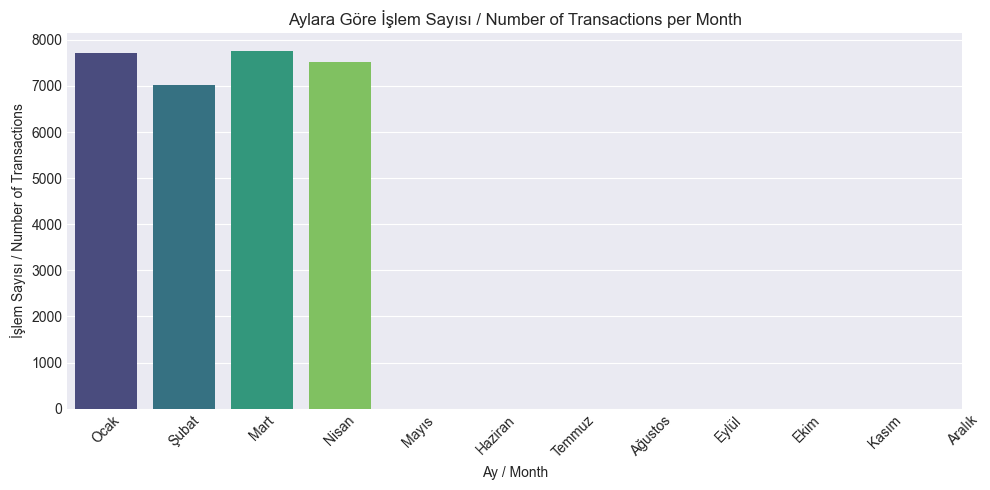

In [187]:
# Aylara göre işlem sayısı / Number of transactions per month
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=df, palette='viridis')
plt.title("Aylara Göre İşlem Sayısı / Number of Transactions per Month")
plt.xlabel("Ay / Month")
plt.ylabel("İşlem Sayısı / Number of Transactions")
plt.xticks(ticks=range(0,12), labels=[
    "Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran",
    "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"
], rotation=45)
plt.tight_layout()
plt.show()


In [188]:
# Ürünleri liste haline getir / Split the products into a list
df['Product List'] = df['Products'].apply(lambda x: [item.strip() for item in x.split(',')])


In [189]:
df_products = df.explode('Product List')

In [193]:
# En çok satılan ürünleri say / Count most sold products
top_products = df_products['Product List'].value_counts().head(15)

C:\Users\aziz-\AppData\Local\Temp\ipykernel_22776\1263528238.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette="cubehelix")


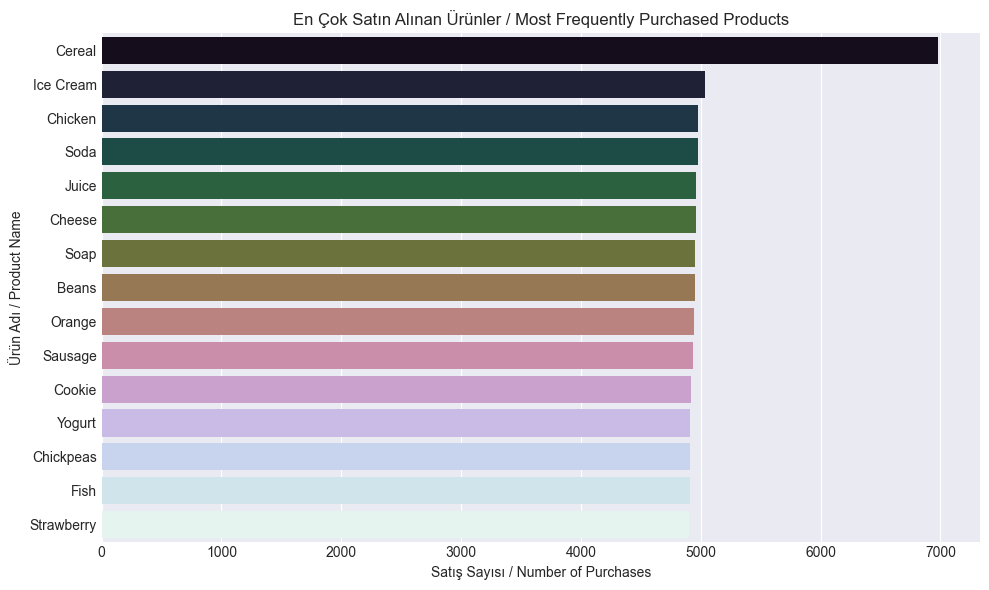

In [195]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette="cubehelix")
plt.title("En Çok Satın Alınan Ürünler / Most Frequently Purchased Products")
plt.xlabel("Satış Sayısı / Number of Purchases")
plt.ylabel("Ürün Adı / Product Name")
plt.tight_layout()
plt.show()

C:\Users\aziz-\AppData\Local\Temp\ipykernel_22776\3555888349.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, order=order, palette='magma')


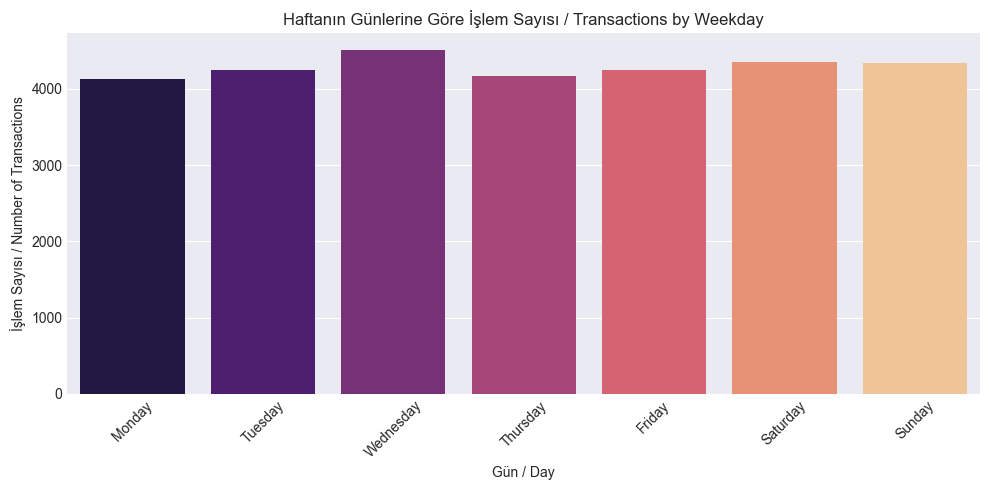

In [196]:
# Görselleştirme / Visualization
plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Weekday', data=df, order=order, palette='magma')
plt.title("Haftanın Günlerine Göre İşlem Sayısı / Transactions by Weekday")
plt.xlabel("Gün / Day")
plt.ylabel("İşlem Sayısı / Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()

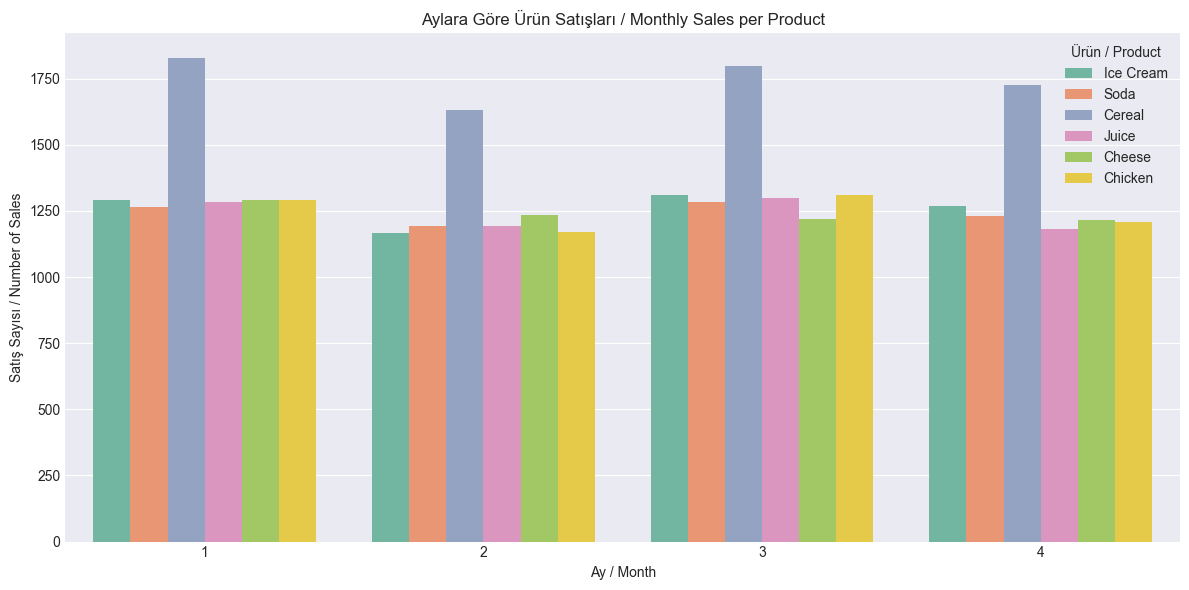

In [197]:
# Örnek: En popüler 6 ürün için ay ay satış sayısı çiz / Plot for top 6 products
top_products = df_products['Product List'].value_counts().head(6).index
seasonal_data = df_products[df_products['Product List'].isin(top_products)]

plt.figure(figsize=(12, 6))
sns.countplot(data=seasonal_data, x='Month', hue='Product List', palette='Set2')
plt.title("Aylara Göre Ürün Satışları / Monthly Sales per Product")
plt.xlabel("Ay / Month")
plt.ylabel("Satış Sayısı / Number of Sales")
plt.legend(title='Ürün / Product')
plt.tight_layout()
plt.show()

In [199]:
# En az satılan 15 ürünü bul / Get 15 least sold products
least_sold_products = df_products['Product List'].value_counts().tail(15)

In [200]:
# En az satılan ilk 10 ürünü göster / Show bottom 10 products
least_sold = least_sold_products.tail(10)
print("En Az Satılan Ürünler / Least Sold Products:")
print(least_sold)

En Az Satılan Ürünler / Least Sold Products:
Product List
Shampoo      4853
Lentil       4851
Chips        4851
Honey        4836
Chocolate    4824
Apple        4814
Water        4799
Cucumber     4798
Pizza        4783
Detergent    4721
Name: count, dtype: int64


C:\Users\aziz-\AppData\Local\Temp\ipykernel_22776\2119059185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_sold.values, y=least_sold.index, palette='coolwarm')


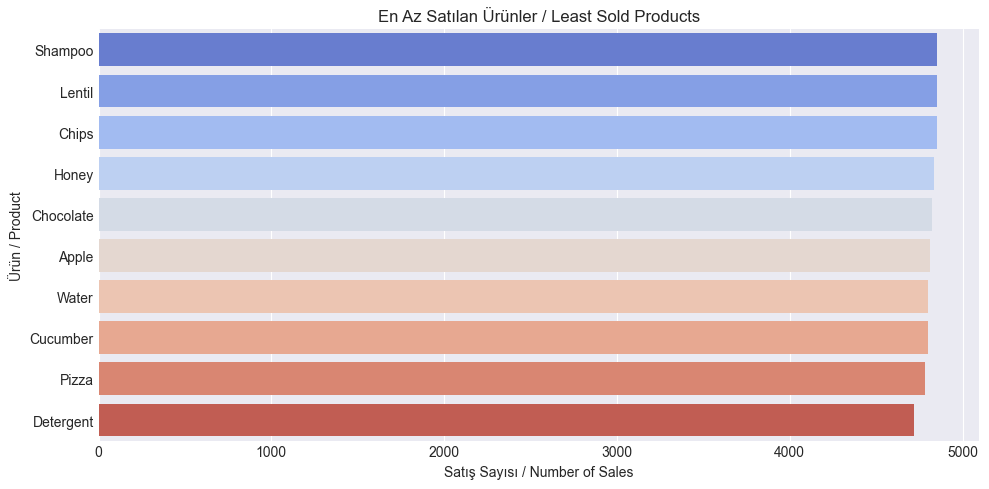

In [201]:
# Görselleştir / Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=least_sold.values, y=least_sold.index, palette='coolwarm')
plt.title("En Az Satılan Ürünler / Least Sold Products")
plt.xlabel("Satış Sayısı / Number of Sales")
plt.ylabel("Ürün / Product")
plt.tight_layout()
plt.show()

In [203]:
# Her kullanıcıya göre ürün matrisi / Create User-Item matrix
user_item_matrix = df.explode('Product List').pivot_table(
    index='CustomerID',
    columns='Product List',
    aggfunc='size',
    fill_value=0
)

In [204]:
# Benzerlik hesapla / Compute similarity
cosine_sim = cosine_similarity(user_item_matrix)
similarity_df = pd.DataFrame(cosine_sim, index=user_item_matrix.index, columns=user_item_matrix.index)


In [206]:
# Öneri fonksiyonu / Recommendation function
def recommend_products(customer_id, top_n=5):
    similar_users = similarity_df[customer_id].sort_values(ascending=False)[1:6]
    similar_user_ids = similar_users.index

    # Bu kullanıcıların aldığı ama bizim almadığımız ürünleri alalım
    customer_products = set(user_item_matrix.loc[customer_id][user_item_matrix.loc[customer_id] > 0].index)
    recommended = set()

    for user in similar_user_ids:
        user_products = set(user_item_matrix.loc[user][user_item_matrix.loc[user] > 0].index)
        recommended |= user_products - customer_products

    return list(recommended)[:top_n]


In [209]:
# Örnek: C385 için öneri / Recommendation for user C385
print(recommend_products('C385'))

['Ice Cream']


In [211]:
print(recommend_products('C831'))

['Butter', 'Orange']


In [213]:
print(recommend_products('C291'))

['Water']
